# Local thickness on synthetic data in 2D and 3D, comparison with and without scaling

**Local thickness using `localthickness` module on syntethic data. Comparison of results with and without scaling. Requires no data donwload.** 

Authors: vand@dtu.dk, abda@dtu.dk

Demos showing the use of the algorithm from `localthickness` module with and without scaling. Demos work on synthetically generated data.

For an object in 2D or 3D, the local thickness in any point of the object is defined as the radius of the larges sphere which fits inside the object and contains the point. Function for the computation of local thickness takes a binary 2D or 3D image as input, where ones represent the object to be measured. The function returns an array of the same size as the input which in every pixel (voxel) carries information about the local thickness of the object. Function call is
```
T = local_thickness(B, scale=1, mask=None)
```
Here, `B` is a binary image, `scale` is downscaling factor (smaller than 1), and `mask` is an optional binary mask of the same size as the image defining parts of the image to be included in the computation of the local thicknes.

We show the use scaling and with scaling which speeds up the computation. Here we use `scale=0.5`, but for very large images or volumes, you may consider a stronger scaling, e.g. `scaling=0.25`. 



In [12]:
# Install localthickness (if not installed)
!pip install edt
!pip install localthickness


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time
import localthickness as lt


## 2D local thickness, not scaled and scaled

In [14]:
# Create test image
B = lt.create_test_volume((1200, 800), sigma=15, boundary=0.02, seed=2)


In [15]:
# Local thickness algorithm, without scalling.
start_time = time.time()
thickness = lt.local_thickness(B)
time_thickness = time.time() - start_time


In [16]:
# Scaled algorithm that speeds up computation.
scale = 0.5
start_time = time.time()
thickness_scaled = lt.local_thickness_scaled(B, scale=scale)
time_scaled = time.time() - start_time


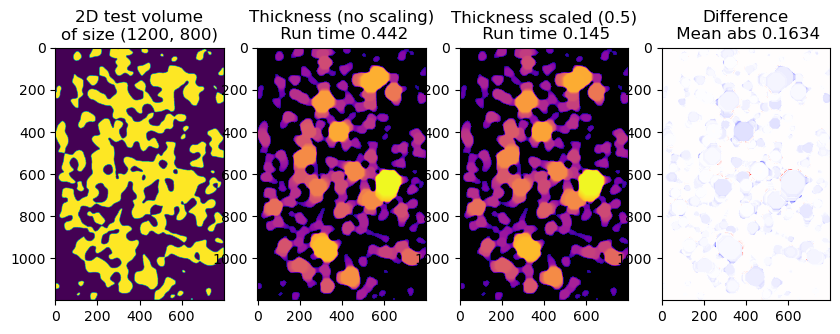

In [17]:
# Prepare for visualization.
maxval = max(np.abs(thickness).max(), np.abs(thickness_scaled).max())
diff = thickness_scaled - thickness
maxd = np.abs(diff).max()


# Visualize.
fig, ax = plt.subplots(1, 4, figsize=(10, 5))
ax[0].imshow(B)
ax[0].set_title(f'2D test volume\nof size {B.shape}')
ax[1].imshow(thickness, vmin=0, vmax=maxval, cmap=lt.black_plasma())
ax[1].set_title(f'Thickness (no scaling)\n Run time {time_thickness:0.3}')
ax[2].imshow(thickness_scaled, vmin=0, vmax=maxval, cmap=lt.black_plasma())
ax[2].set_title(f'Thickness scaled ({scale})\n Run time {time_scaled:0.3}')
ax[3].imshow(diff, vmin=-maxd/2, vmax=maxd/2, cmap=plt.cm.seismic)
ax[3].set_title(f'Difference\n Mean abs {np.abs(diff).mean():0.4}')
plt.show()


###### Conclusion
Using scaling speeds up the computation, with only slight change in the final result.

## 3D local thickness, not scaled and scaled

In [8]:
# Create test volume.
B = lt.create_test_volume((120, 250, 200), sigma=5, boundary=0.05, seed=0)


In [9]:
# Local thickness algorithm (may be slow for large 3D images).
start_time = time.time()
thickness = lt.local_thickness(B)
time_thickness = time.time() - start_time


In [10]:
# Scaled algorithm that speeds up computation.
scale = 0.5
start_time = time.time()
thickness_scaled = lt.local_thickness_scaled(B, scale=scale)
time_scaled = time.time() - start_time


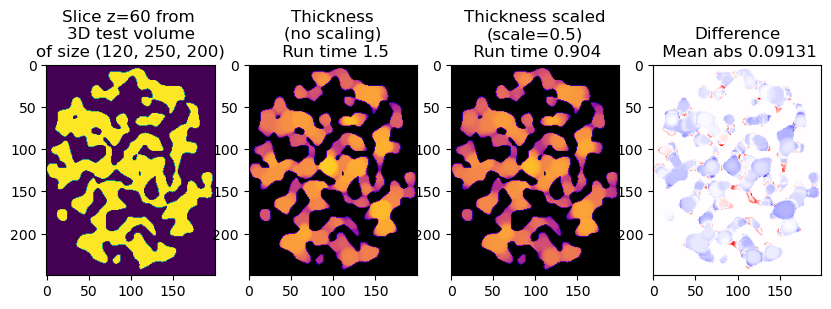

In [11]:
# Prepare for visualization.
maxval = max(np.abs(thickness).max(), np.abs(thickness_scaled).max())
diff = thickness_scaled - thickness
maxd = np.abs(diff).max()

# Visualze.
z = 60
fig, ax = plt.subplots(1, 4, figsize=(10, 5))
ax[0].imshow(B[z])
ax[0].set_title(f'Slice z={z} from \n3D test volume\nof size {B.shape}')
ax[1].imshow(thickness[z], vmin=0, vmax=maxval, cmap=lt.black_plasma())
ax[1].set_title(f'Thickness\n(no scaling)\n Run time {time_thickness:0.3}')
ax[2].imshow(thickness_scaled[z], vmin=0, vmax=maxval, cmap=lt.black_plasma())
ax[2].set_title(f'Thickness scaled\n(scale={scale})\n Run time {time_scaled:0.3}')
ax[3].imshow(diff[z], vmin=-maxd, vmax=maxd, cmap=plt.cm.seismic)
ax[3].set_title(f'Difference\n Mean abs {np.abs(diff).mean():0.4}')
plt.show()


###### Conclusion
Also in 3D, using scaling speeds up the computation, with only slight change in the final result.